In [13]:
import pandas as pd
df = pd.read_csv("E:\Datas\Sample - Superstore.csv", encoding="latin1")   # or encoding="ISO-8859-1"


In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [21]:
df['Order ID'].value_counts()

Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64

In [19]:
m=df.loc[df['Order ID']=='CA-2017-100111','Customer Name']
print(m)

6090    Seth Vernon
6091    Seth Vernon
6092    Seth Vernon
6093    Seth Vernon
6094    Seth Vernon
6095    Seth Vernon
6096    Seth Vernon
6097    Seth Vernon
6098    Seth Vernon
6099    Seth Vernon
6100    Seth Vernon
6101    Seth Vernon
6102    Seth Vernon
6103    Seth Vernon
Name: Customer Name, dtype: object


In [24]:
df['Customer Name'].value_counts()

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64

In [27]:
n=df.loc[df['Customer Name']=='Willaim Brown','Order ID']
print(n)

Series([], Name: Order ID, dtype: object)


In [28]:
df.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [30]:
rev_cat=df.groupby(['Category'])['Sales'].sum()
print(rev_cat)

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


In [33]:
rev_cat=df.groupby(['Region'])['Sales'].sum()
print(rev_cat.sort_values(ascending=False))

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


In [35]:
rev_cat=df.groupby(['Segment'])['Sales'].sum()
print(rev_cat.sort_values())

Segment
Home Office    4.296531e+05
Corporate      7.061464e+05
Consumer       1.161401e+06
Name: Sales, dtype: float64


In [38]:
# Equivalent to pivot table using groupby
revenue_analysis = df.groupby(['Category', 'Region', 'Segment'])['Sales'].sum().unstack()
print(revenue_analysis.round(2))

Segment                   Consumer  Corporate  Home Office
Category        Region                                    
Furniture       Central   86229.22   52085.60     25482.34
                East     114211.80   64209.05     29870.36
                South     70800.20   29645.03     16853.45
                West     119808.09   83080.11     49724.55
Office Supplies Central   93111.48   41137.70     32777.24
                East     101255.14   66474.74     37786.18
                South     59504.58   45930.17     20216.56
                West     110080.94   77133.86     33638.45
Technology      Central   72690.74   64772.51     32953.07
                East     135441.23   69725.57     59807.19
                South     65276.19   46310.73     37184.99
                West     132991.75   65641.31     53358.77


In [39]:
table=pd.pivot_table(df,
                     values='Sales',
                     index=['Category','Region'],
                     columns='Segment',
                     aggfunc='sum'
)
print(table)

Segment                    Consumer   Corporate  Home Office
Category        Region                                      
Furniture       Central   86229.219  52085.6018   25482.3430
                East     114211.802  64209.0460   29870.3560
                South     70800.204  29645.0315   16853.4485
                West     119808.087  83080.1065   49724.5500
Office Supplies Central   93111.479  41137.7010   32777.2350
                East     101255.136  66474.7350   37786.1840
                South     59504.581  45930.1700   20216.5620
                West     110080.940  77133.8560   33638.4530
Technology      Central   72690.736  64772.5100   32953.0660
                East     135441.229  69725.5660   59807.1860
                South     65276.186  46310.7310   37184.9910
                West     132991.746  65641.3120   53358.7740


In [40]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [47]:
best_sell=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

print(best_sell)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [4]:
#profitability trends
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

<Axes: xlabel='Category', ylabel='Sales'>

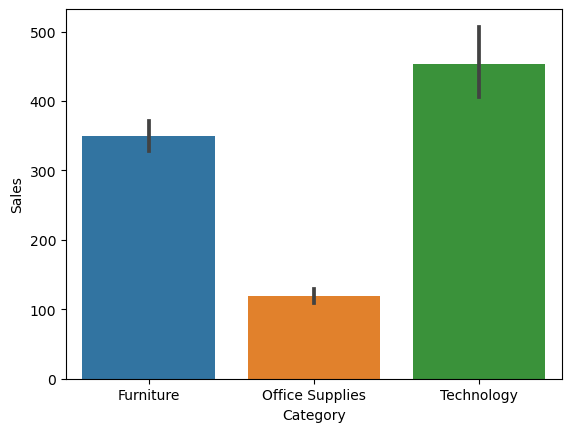

In [6]:
import seaborn as sns
sns.barplot(x=df['Category'],y=df['Sales'])

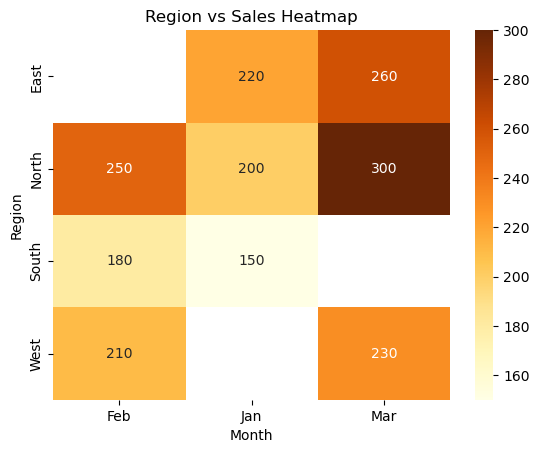

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Region': ['North', 'North', 'North', 'South', 'South', 'East', 'East', 'West', 'West'],
    'Month':  ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Jan', 'Mar', 'Feb', 'Mar'],
    'Sales':  [200, 250, 300, 150, 180, 220, 260, 210, 230]
}

df = pd.DataFrame(data)

pivot = df.pivot_table(index='Region', columns='Month', values='Sales', aggfunc='sum')

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Region vs Sales Heatmap")
plt.show()


<Axes: xlabel='Segment', ylabel='Category'>

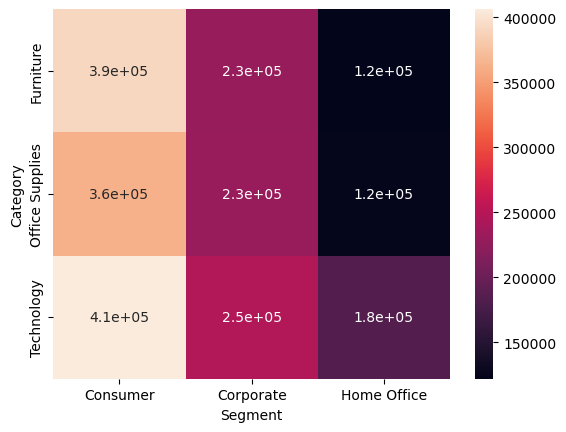

In [15]:
table=pd.pivot_table(df,
                     values='Sales',
                     index='Category',
                     columns='Segment',
                     aggfunc='sum'
)
sns.heatmap(table, annot=True)


In [18]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [19]:
df['Month']= df['Order Date'].dt.month

In [20]:
monthyl_sales=df.groupby('Month')['Sales'].sum().reset_index()

In [21]:
print(monthyl_sales)

    Month        Sales
0       1   94924.8356
1       2   59751.2514
2       3  205005.4888
3       4  137762.1286
4       5  155028.8117
5       6  152718.6793
6       7  147238.0970
7       8  159044.0630
8       9  307649.9457
9      10  200322.9847
10     11  352461.0710
11     12  325293.5035


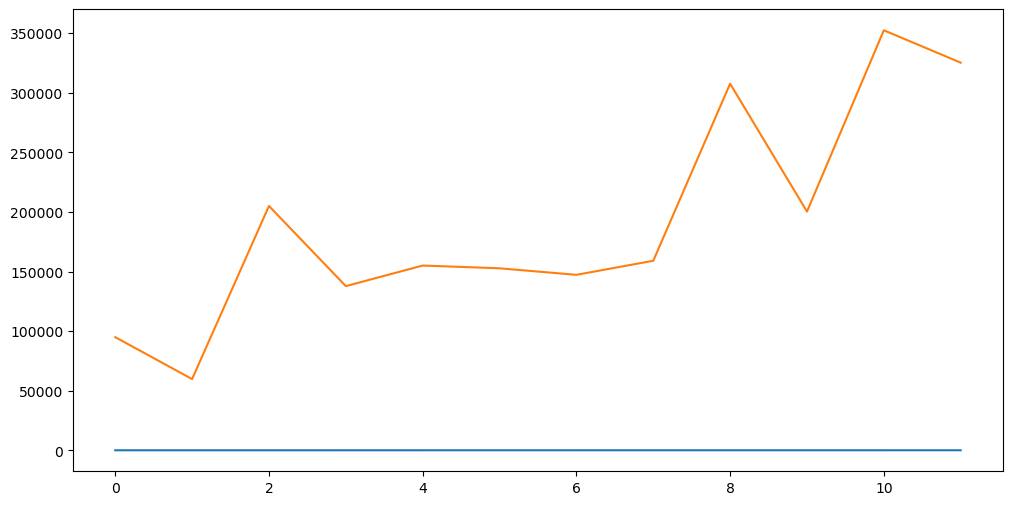

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(monthyl_sales)
plt.show()

In [1]:
import os
print(os.getcwd())

C:\Users\asus
